## Spam Mail Detection

### Importing Libraries

In [212]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [213]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/varma1221/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [214]:
df = pd.read_csv("/home/varma1221/codexinternship/Spam Mail Detection/spam.csv", encoding="latin1")

In [215]:
print(df.head())

     v1  ... Unnamed: 4
0   ham  ...        NaN
1   ham  ...        NaN
2  spam  ...        NaN
3   ham  ...        NaN
4   ham  ...        NaN

[5 rows x 5 columns]


In [216]:
df = df[["v1", "v2"]]
df = df.rename(columns={"v1": "label", "v2": "message"})
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [217]:
print(df["label"].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


## Preprocessing

#### lowercasing

In [218]:
df["message"] = df["message"].str.lower()
print(df.head())

  label                                            message
0   ham  go until jurong point, crazy.. available only ...
1   ham                      ok lar... joking wif u oni...
2  spam  free entry in 2 a wkly comp to win fa cup fina...
3   ham  u dun say so early hor... u c already then say...
4   ham  nah i don't think he goes to usf, he lives aro...


#### Tokenization

In [219]:
tokenized_msgs = []

for msg in df["message"]:
    tokens = word_tokenize(msg.lower())
    tokenized_msgs.append(tokens)

df["tokens"] = tokenized_msgs

print(df[["message", "tokens"]].head())

                                             message                                             tokens
0  go until jurong point, crazy.. available only ...  [go, until, jurong, point, ,, crazy, .., avail...
1                      ok lar... joking wif u oni...           [ok, lar, ..., joking, wif, u, oni, ...]
2  free entry in 2 a wkly comp to win fa cup fina...  [free, entry, in, 2, a, wkly, comp, to, win, f...
3  u dun say so early hor... u c already then say...  [u, dun, say, so, early, hor, ..., u, c, alrea...
4  nah i don't think he goes to usf, he lives aro...  [nah, i, do, n't, think, he, goes, to, usf, ,,...


#### Stopword Removal

In [220]:
stop_words = set(stopwords.words('english'))

filtered_msgs = []

for tokens in df['tokens']:
    filtered = [w for w in tokens if w not in stop_words]
    filtered_msgs.append(filtered)
df["tokens_no_stopwords"] = filtered_msgs

df["cleaned_messages"] = [" ".join(tokens) for tokens in df["tokens_no_stopwords"]]

print(df[['tokens', 'tokens_no_stopwords']].head())

                                              tokens                                tokens_no_stopwords
0  [go, until, jurong, point, ,, crazy, .., avail...  [go, jurong, point, ,, crazy, .., available, b...
1           [ok, lar, ..., joking, wif, u, oni, ...]           [ok, lar, ..., joking, wif, u, oni, ...]
2  [free, entry, in, 2, a, wkly, comp, to, win, f...  [free, entry, 2, wkly, comp, win, fa, cup, fin...
3  [u, dun, say, so, early, hor, ..., u, c, alrea...  [u, dun, say, early, hor, ..., u, c, already, ...
4  [nah, i, do, n't, think, he, goes, to, usf, ,,...  [nah, n't, think, goes, usf, ,, lives, around,...


### Bag of Words(BoW)

In [221]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df["cleaned_messages"])
y = df['label']

#### Train/Test Split (BoW)

In [222]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Set Size: ", X_train_bow.shape[0])
print("Testing Set Size: ", X_test_bow.shape[0])

Training Set Size:  4457
Testing Set Size:  1115


### TF-IDF

In [223]:
tf_idf_vectorizer = TfidfVectorizer()

x_tfidf = tf_idf_vectorizer.fit_transform(df["cleaned_messages"])

#### Train/Test Split (TF-IDF)

In [224]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    x_tfidf, y, test_size=0.2, random_state=42
)
print("Training Set Size: ", X_train_tfidf.shape[0])
print("Testing Set Size: ", X_test_tfidf.shape[0])

Training Set Size:  4457
Testing Set Size:  1115


### Naive Bayes Classification Model

In [225]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train_bow)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


#### Predictions

In [226]:
y_pred = nb_model.predict(X_test_bow)

### Evaluations

Accuracy: 0.9748878923766816


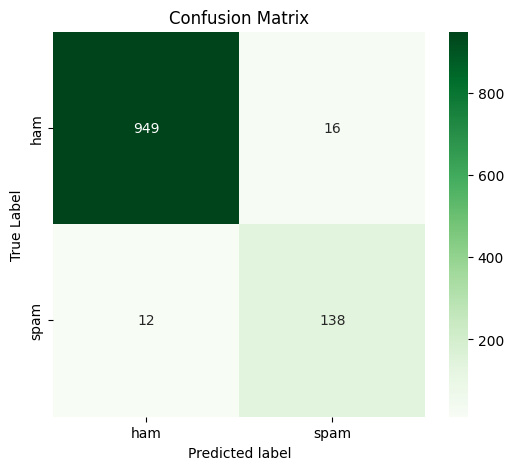


Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.98      0.99       965
        spam       0.90      0.92      0.91       150

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.95      1115
weighted avg       0.98      0.97      0.98      1115



In [227]:
print("Accuracy:", accuracy_score(y_test_bow, y_pred))
cm = confusion_matrix(y_test_bow, y_pred, labels=['ham', 'spam'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["ham", "spam"], yticklabels=["ham", "spam"])
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print("\nClassification Report:\n", classification_report(y_test_bow, y_pred))


### Logistic Regression

In [228]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_bow, y_train_bow)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### Prediction

In [229]:
y_pred = log_model.predict(X_test_bow)

#### Evaluations

Accuracy: 0.9802690582959641


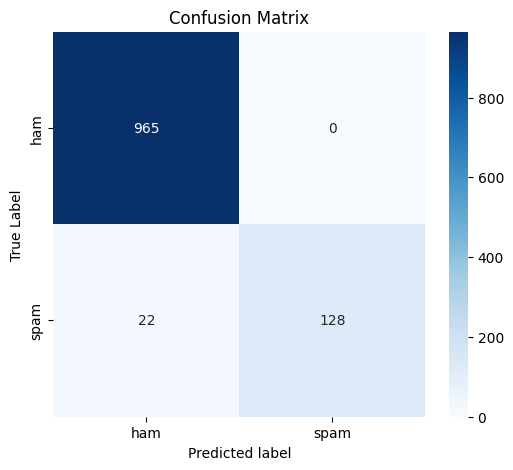


Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [230]:
print("Accuracy:", accuracy_score(y_test_bow, y_pred))
cm = confusion_matrix(y_test_bow, y_pred, labels=['ham', 'spam'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["ham", "spam"], yticklabels=["ham", "spam"])
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print("\nClassification Report:\n", classification_report(y_test_bow, y_pred))
